#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [ ]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [ ]:
df=df.drop(['Id','Notes','Status','Agency'],axis=1)
df.head(1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011


In [ ]:
df['TotalPay'] = pd.to_numeric(df['TotalPay'],errors='coerce')
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [ ]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [ ]:
df.columns


Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

 **Handling** **missing** **data**

In [ ]:
for c in df.columns:
  if df[c].dtype=='o':
      df[c]=df[c].fillna(df[c].mode.values[0])
  else:
    df[c]=df[c].fillna(df[c].mean)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  int64  
 2   BasePay           148654 non-null  object 
 3   OvertimePay       148654 non-null  object 
 4   OtherPay          148654 non-null  object 
 5   Benefits          148654 non-null  object 
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 10.2+ MB
None


In [ ]:
df['Benefits']=df['Benefits'].replace('NaN',np.mean)


In [ ]:
df.isna().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

**invert categorical to numerical**

In [ ]:
df['JobTitle'].unique()


array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

In [ ]:
dic = {}
lst = list(df['JobTitle'].unique())

for i in range(len(lst)):
    dic[i] = lst[i]
print(dic)

{0: 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY', 1: 'CAPTAIN III (POLICE DEPARTMENT)', 2: 'WIRE ROPE CABLE MAINTENANCE MECHANIC', 3: 'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)', 4: 'ASSISTANT DEPUTY CHIEF II', 5: 'BATTALION CHIEF, (FIRE DEPARTMENT)', 6: 'DEPUTY DIRECTOR OF INVESTMENTS', 7: 'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)', 8: 'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)', 9: 'EXECUTIVE CONTRACT EMPLOYEE', 10: 'DEPARTMENT HEAD V', 11: 'COMMANDER III, (POLICE DEPARTMENT)', 12: 'CAPTAIN, EMERGENCYCY MEDICAL SERVICES', 13: 'ASSISTANT MEDICAL EXAMINER', 14: 'CAPTAIN, FIRE SUPPRESSION', 15: 'CHIEF OF POLICE', 16: 'DEPUTY CHIEF III (POLICE DEPARTMENT)', 17: 'INSPECTOR III, (POLICE DEPARTMENT)', 18: 'ELECTRONIC MAINTENANCE TECHNICIAN', 19: 'ADMINISTRATOR, SFGH MEDICAL CENTER', 20: 'LIEUTENANT III (POLICE DEPARTMENT)', 21: 'FIREFIGHTER', 22: 'NURSING SUPERVISOR PSYCHIATRIC', 23: 'MAYOR', 24: 'LIEUTENANT, FIRE DEPARTMENT', 25: 'INCIDENT SUPPORT SPECIALIST', 26: 'ANESTHETIST'

In [ ]:
df['JobTitle'] = df['JobTitle'].apply(lambda x: next(key for key, value in dic.items() if value == x) if x in dic.values() else x)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for c in df.columns:
  if df[c].dtype=='o':
    df[c]=le.fit_transform(df[c])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  int64  
 2   BasePay           148654 non-null  object 
 3   OvertimePay       148654 non-null  object 
 4   OtherPay          148654 non-null  object 
 5   Benefits          148654 non-null  object 
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 10.2+ MB
None


 visualization the distribution of salaries

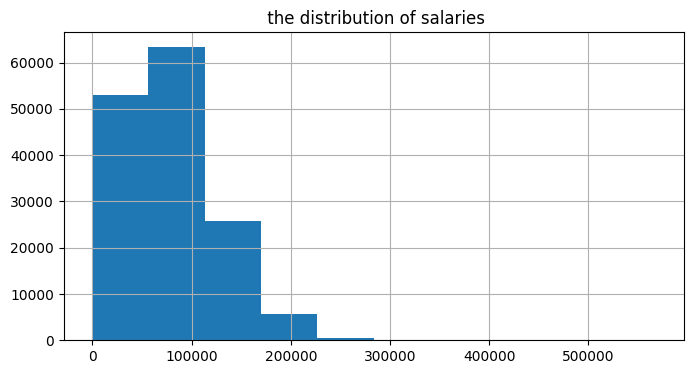

In [ ]:
df['TotalPay'].hist(figsize=(8,4))
plt.title(' the distribution of salaries')
plt.show()


In [ ]:
multiple_aggregations = df.groupby(['JobTitle','TotalPayBenefits'])['TotalPay'].agg(['count', 'sum', 'mean'])

print(multiple_aggregations)


                           count        sum       mean
JobTitle TotalPayBenefits                             
0        230827.12             1  230827.12  230827.12
         567595.43             1  567595.43  567595.43
1        91929.37              1   91929.37   91929.37
         130470.42             1  130470.42  130470.42
         172472.15             1  172472.15  172472.15
...                          ...        ...        ...
2154     31571.23              1   31571.23   31571.23
2155     23151.88              1   17363.14   17363.14
2156     3361.44               1    3361.44    3361.44
2157     2074.60               1    2074.60    2074.60
2158     0.00                  4       0.00       0.00

[143535 rows x 3 columns]


count        sum       mean
JobTitle TotalPayBenefits                             
0        230827.12             1  230827.12  230827.12
         567595.43             1  567595.43  567595.43
1        91929.37              1   91929.37   91929.37
         130470.42             1  130470.42  130470.42
         172472.15             1  172472.15  172472.15
...                          ...        ...        ...
2154     31571.23              1   31571.23   31571.23
2155     23151.88              1   17363.14   17363.14
2156     3361.44               1    3361.44    3361.44
2157     2074.60               1    2074.60    2074.60
2158     0.00                  4       0.00       0.00

[143535 rows x 3 columns]

**Simple Correlation Analysis**

In [ ]:
corr = df.corr()
corr

<ipython-input-20-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
JobTitle,1.000000,-0.324896,-0.178164,-0.204237,-0.522438,-0.350263,-0.201205,0.631822
BasePay,-0.324896,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595,0.033751
OvertimePay,-0.178164,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981,0.027887
OtherPay,-0.204237,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341,-0.002499
Benefits,-0.522438,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140,-0.043136
TotalPay,-0.350263,0.954494,0.504859,0.470496,0.884097,1.000000,0.977313,0.032090
TotalPayBenefits,-0.201205,0.946595,0.467981,0.422341,0.930140,0.977313,1.000000,0.151947
Year,0.631822,0.033751,0.027887,-0.002499,-0.043136,0.032090,0.151947,1.000000


<Axes: >

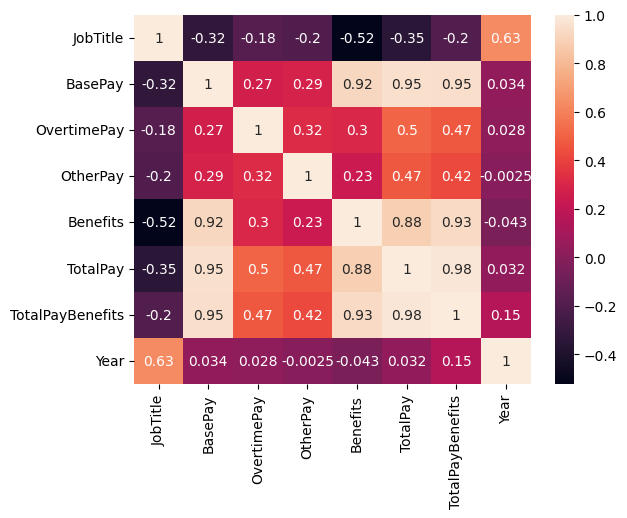

In [ ]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='TotalPayBenefits', ylabel='TotalPay'>

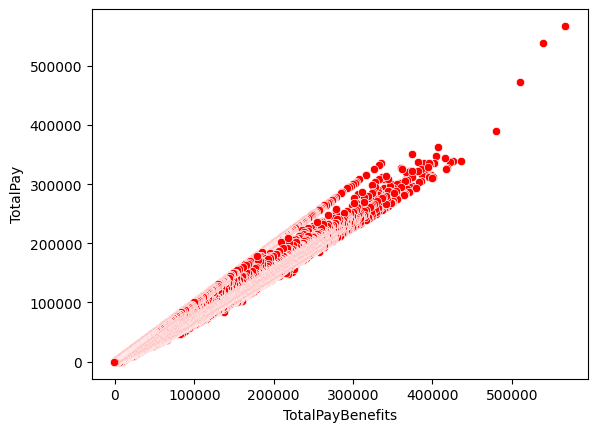

In [ ]:
sns.scatterplot(x='TotalPayBenefits', y='TotalPay', data=df,color='red')


1. *Introduction:*
   - Briefly introduce the dataset, outlining its purpose, source, and any key characteristics.

2. *Data Overview:*
   - Provide a snapshot of the dataset, including the number of records, features, and data types.

3. *Data Quality:*
   - Summarize any data cleaning and preprocessing steps, addressing issues like missing values, outliers, and duplicates.

4. *Exploratory Data Analysis (EDA):*
   - Highlight key insights from EDA, such as central tendencies, distributions, and notable patterns within the data.

5. *Feature Analysis:*
   - Discuss significant features, their importance, and any transformations or engineering performed.

6. *Correlations and Relationships:*
   - Identify and summarize notable correlations or relationships between variables.

7. *Visualizations:*
   - Showcase relevant visualizations that aid in understanding the data, such as histograms, scatter plots, or heatmaps.

8. *Modeling Insights (if applicable):*
   - If modeling was conducted, briefly touch upon model performance, key findings, and important features.

9. *Limitations:*
   - Acknowledge any limitations or challenges encountered during the analysis that may impact the reliability of the insights.


# Good Luck!